In [ ]:
""" word2vec with NCE loss 
and code to visualize the embeddings on TensorBoard
"""
from __future__ import print_function, division, absolute_import

import os

import numpy as np
from tensorflow.contrib.tensorboard.plugins import projector
import tensorflow as tf

In [ ]:
from process_data import process_data

make_batch_gen = lambda: process_data(NPY_FILENAME, VOCAB_SIZE, BATCH_SIZE, SKIP_WINDOW, MAX_NPY_WORDS)

In [ ]:
# === VOCAB_SIZE === 50001 (include UNK) # 100001 ( UNK 포함 )
VOCAB_SIZE = 50001
BATCH_SIZE = 128
EMBED_SIZE = 200  # 128  # dimension of the word embedding vectors
SKIP_WINDOW = 5  # the context window
NUM_SAMPLED = 64    # Number of negative examples to sample.
LEARNING_RATE = 0.2

USE_L2_NORM = False

NPY_FILENAME  = 'text17.npy'
MAX_NPY_WORDS = 188333610 - 100 # max words in textNN.npy

VOCAB_FILENAME = 'vocab_50k.tsv'
VOCAB_SEP      = '|'


# NUM_TRAIN_STEPS = 100000 # 10000
NUM_TRAIN_STEPS = MAX_NPY_WORDS * 20 # 290000 # 10000 # 아래 "특이사항" 참고
SKIP_STEP = 50000 # 20000  # how many steps to skip before reporting the loss

In [ ]:
#coding: utf-8

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from collections import Counter
import sys
import random
import os
import zipfile

import numpy as np

import h5py

import tensorflow as tf


index_words = np.memmap(NPY_FILENAME,dtype='int64',mode='r+')
# assert np.all(index_words < 50001), np.where(index_words >= 50001)

index_words.shape

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
?plt.hist

In [ ]:
plt.hist(index_words, log=True)

In [ ]:
np.amax(index_words), np.amin(index_words)

In [ ]:
""" word2vec with NCE loss 
and code to visualize the embeddings on TensorBoard
"""
from __future__ import print_function, division, absolute_import

import os

import numpy as np
from tensorflow.contrib.tensorboard.plugins import projector
import tensorflow as tf

In [7]:
vocab_list = []
vocab_freq = dict()
freq_list = []
with open('vocab_50k.tsv') as f:
    for line in f.xreadlines():
        k, v = line.strip().split('|')
        v    = int(v)
        vocab_list.append((k,v))
        vocab_freq[k] = v
        freq_list.append(v)
# freq_list

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

<Container object of 199 artists>

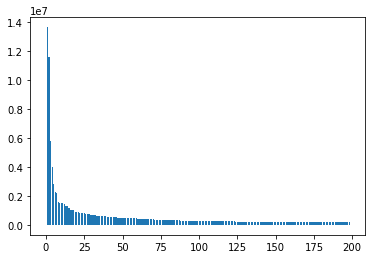

In [19]:
f = freq_list[:199]
l = len(f)
plt.bar(range(l), f)

In [14]:
f

[-1,
 13642345,
 11623000,
 5759558,
 3968537,
 2821834,
 2276173,
 2203254,
 1579732,
 1542032]

In [16]:
!head -55 vocab_50k.tsv

UNK|-1
하|13642345
이|11623000
있|5759558
되|3968537
것|2821834
수|2276173
들|2203254
보|1579732
않|1542032
없|1512106
적|1490806
년|1442500
지|1334300
주|1330907
그|1141599
말|1055286
때문|1036804
때|1007790
아니|910671
등|885430
중|883856
가|837969
나오|818166
경우|805228
받|793236
1|768671
오|745978
크|726172
2|697839
보이|686578
같|678108
자신|652138
내|645126
사람|634242
사용|601564
이후|597472
많|595818
정도|594158
번|581530
쓰|579770
대하|575554
위하|559966
후|546128
일|540972
나|540472
3|513411
시|509227
만들|508302
좋|506614
가지|495958
공격|483446
위|483438
전|482200
알|477444
